In [1]:
# Gradient Boosting is a machine learning Algorithm for regression and classification problem.
# It relies on the intution that the best possible next model when combined with the previous
# models,minimizes the overall predictor error.
#The key idea is to set the target outcoms for the next model in order to minimize the error.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('Linear-Regression-XGBoost.csv')

### Data Preprocessing

In [4]:
data.head()

,x,y
0,0,-17.78
1,1,-17.22
2,2,-16.67
3,3,-16.11
4,4,-15.56


In [5]:
data.describe()

,x,y
count,1000.000000,1000.000000
mean,499.500000,259.722220
std,288.819436,160.455249
min,0.000000,-17.780000
25%,249.750000,120.972500
50%,499.500000,259.720000
75%,749.250000,398.470000
max,999.000000,537.220000


In [6]:
X=data.loc[:,data.columns=='x']

In [7]:
y=data.loc[:,data.columns=='y']

### Split Data into Train and Test and use GradientBoostingRegressor

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=1)

In [9]:
params={'n_estimators':3,'max_depth':3,'learning_rate':1,'criterion':'mse'}

In [10]:
gradboost=GradientBoostingRegressor(**params)

In [11]:
gradboost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
gradboost.score(X_train,y_train)

0.9892021953916232

In [13]:
gradboost.score(X_test,y_test)

0.9883984559227409

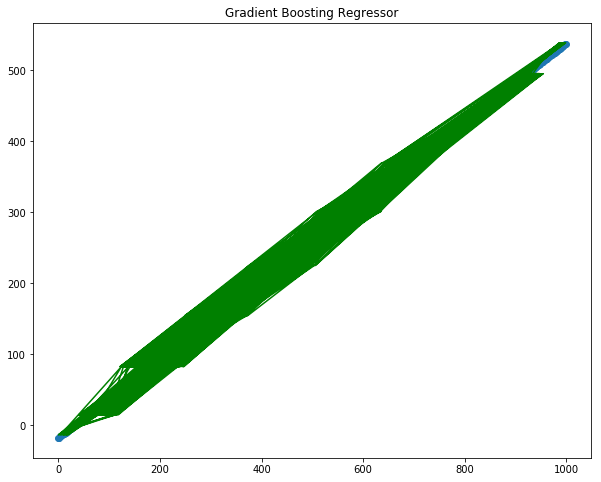

In [14]:
plt.figure(figsize=(10,8))
plt.title('Gradient Boosting Regressor')
plt.scatter(X_train,y_train)
plt.plot(X_train,gradboost.predict(X_train),color='green')
plt.show()

In [15]:
y_pred=gradboost.predict(X_test)

In [16]:
y_pred=pd.DataFrame(y_pred,columns=['Predicted_Values'],index=y_test.index.copy())

In [17]:
y_test.head()

,y
507,263.89
818,436.67
452,233.33
368,186.67
242,116.67


In [18]:
y_pred.head()

,Predicted_Values
507,225.198395
818,428.504615
452,225.198395
368,154.727284
242,82.798891


In [19]:
concat_act_pred=pd.concat([y_test,y_pred],axis=1)

In [20]:
concat_act_pred.head()

,y,Predicted_Values
507,263.89,225.198395
818,436.67,428.504615
452,233.33,225.198395
368,186.67,154.727284
242,116.67,82.798891


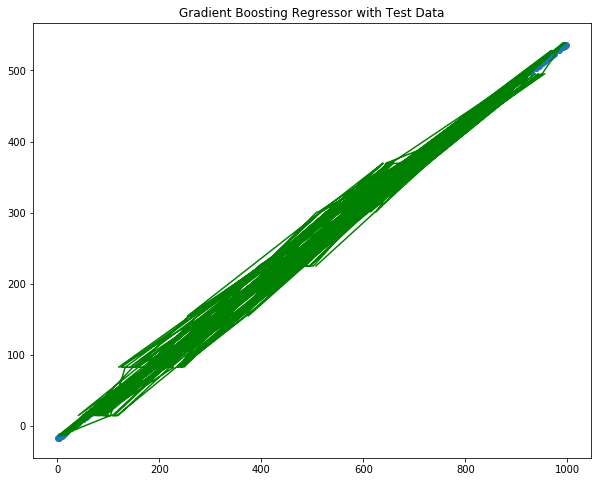

In [21]:
plt.figure(figsize=(10,8))
plt.title('Gradient Boosting Regressor with Test Data')
plt.scatter(X_test,y_test)
plt.plot(X_test,gradboost.predict(X_test),color='green')
plt.show()